In [9]:
import numpy as np
np.set_printoptions(linewidth=100)
import sympy as sm
import sympy.abc as sbl
from scipy.sparse import diags
import scipy.sparse.linalg as la
import scipy.sparse as sp
sm.init_printing()
import time
import matplotlib.pyplot as plt
import matplotlib

In [11]:
h, x = sm.Symbol("h", positive=True), sm.Symbol("x", positive=True)

In [12]:
def phi(i):
    
    if i == 0 :
        return sm.Piecewise( ( ( -x + (i+1)*h) / h, (x >=i*h) & (x <= (i+1)*h)) , \
                           (0, True) 

                      )
    elif i == N:
        return sm.Piecewise(  ((x - (i-1)*h) / h, (x >=(i-1)*h) & (x <= i*h))   , \
                   (0, True) 
                                       )             
    else:
        return sm.Piecewise(
                           ((x - (i-1)*h) / h, (x >=h*(i-1)) & (x <= i*h))    , \
                           ( ( -x + (i+1)*h) / h, (x >=i*h) & (x <= (i+1)*h)) , \
                           (0, True)  
                       )



In [ ]:
def intgA(i, j):
    if i == j == 0:
         return sm.integrate(phi(i)**2, (x,(i)*h, (i+1)*h)) 
    elif i == j == N:
        return sm.integrate(phi(i)**2, (x,(i-1)*h, i*h))
    elif i == j:
        return sm.integrate(phi(i)**2, (x,(i-1)*h, i*h)) + sm.integrate(phi(i)**2, (x,(i)*h, (i+1)*h)) 
    elif i > j:
        return sm.integrate(phi(i) * phi(j), (x,(i-1)*h, i*h)) 
    else:
        return sm.integrate(phi(i) * phi(j),(x,(i)*h, (i+1)*h)) 
        

In [ ]:
def intgB(k, i, j):
    if all([abs(i-j)  in [0, 1],  abs(j-k) in [0, 1], abs(k - i) in [0, 1]]):

        if i == j == k == 0:
             return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
        elif i == j == k == N:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h))
        elif i == j == k:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) + sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
        elif i > j or i > k:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) 
        else:
            return sm.integrate(phi(k)*phi(i) * phi(j).diff(x),(x,(i)*h, (i+1)*h)) 
    else:
        return 0

In [ ]:
sm.integrate(phi(0)*sm.Matrix([phi(i).diff(x) for i in range(6)])* sm.Matrix([phi(i) for i in range(6)]).T, (x, 0, h))

In [ ]:
sm.Matrix([phi(i) for i in range(6)]).T

In [ ]:
def intgC(i, j):
    if i == j == 0:
         return sm.integrate(phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
    elif i == j == N:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h))
    elif i == j:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) + sm.integrate(phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
    elif i > j:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) 
    else:
        return sm.integrate(phi(i)*phi(j).diff(x),(x,(i)*h, (i+1)*h)) 
        

In [ ]:
def intgD(i, j):
    if i == j == 0:
         return sm.simplify(phi(i)*phi(j).diff(x))
    elif i == j == N:
        return sm.simplify(phi(i)*phi(j).diff(x))
    elif i == j:
        return sm.simplify(phi(i)*phi(j).diff(x)) + sm.simplify(phi(i)*phi(j).diff(x))
    elif i > j:
        return sm.simplify(phi(i)*phi(j).diff(x))
    else:
        return sm.simplify(phi(i)*phi(j).diff(x))
        

sm.Matrix(N+1, 1, lambda k, _:sm.Matrix(N+1, N+1, lambda i, j:intgB(k,i, j)))

In [ ]:
sm.Matrix(N+1, N+1, lambda i, j:intgD(i, j))

In [ ]:
sm.simplify(phi(0)*phi(0).diff(x))

In [ ]:
t = sm.abc.t

In [ ]:
expr = sm.exp(t)*sm.sin(sm.pi*x)+sm.pi**2*sm.exp(t)*sm.sin(sm.pi*x)+ sm.pi*sm.exp(2*t)*sm.sin(sm.pi*x)*sm.cos(sm.pi*x)


In [ ]:
# for k in np.linspace(0, 1, N+1)]#(, -(x-(k+1)*h)/h)])

In [60]:
N = 20
k = sm.abc.k
expr = sm.sin(sm.pi*x)*(1+sm.pi**2)

pos = sm.simplify(sm.integrate(expr*(x-(k-1)*h)/h, (x, h*(k-1),h*k)))
neg = sm.simplify(sm.integrate(expr*-(x-(k+1)*h)/h, (x, h*(k),h*(k+1))))


pos = sm.lambdify([k], pos, "numpy")
neg = sm.lambdify([k], neg, "numpy")   

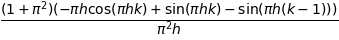

In [61]:
pos

In [65]:
f_t =  sm.Matrix([0]+[pos.subs({k:sm.Rational(l), h:1/sm.Rational(N)}) for l in range(1, N+1)] )+\
                        sm.Matrix([neg.subs({k:sm.Rational(l), h:1/sm.Rational(N)})  for l in range(0, N)]+[0])  
            

In [66]:
f_t

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                          ⎛  
⎢                                                                       20⋅⎝1 
⎢                                                                             
⎢                                                                       ──────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛                      ⎛       ________              ⎞  
⎢                     ⎜                      ⎜      ╱ 5   √5       ⎛1   √5⎞⎟  
⎢                     ⎜         ________     ⎜√2⋅  ╱

In [96]:
from sympy.utilities.lambdify import lambdastr
lambdastr([k], sm.trigsimp(neg ))

'lambda k: ((1 + math.pi**2)*(math.pi*h*math.cos(math.pi*h*k) + math.sin(math.pi*h*k) - math.sin(math.pi*h*(k + 1)))/(math.pi**2*h))'

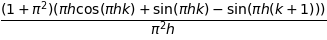

In [74]:
sm.trigsimp(neg )

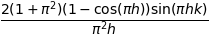

In [77]:
sm.simplify(neg+pos )

In [84]:
help(sm.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=False)
    Translates a SymPy expression into an equivalent numeric function
    
    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:
    
    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]
    
    The primary purpose of this function is to provide a bridge from SymPy
    expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath,
    and tensorflow. In general, SymPy functions do not work with objects from
    other libraries, such as NumPy arrays, and functions from numeric
    libraries like NumPy or mpmath do not work on SymPy e